# Project 1: SAT & ACT Analysis
### Thomas Ludlow, NY-DSI-6
### November 20, 2018

This project involved collection of available data from the ACT and SAT standardized college entrance exams as administered in the US on a state-by-state basis for 2017 and 2018.  Through data analysis, visualization, and hypothesis testing, we look at explore the question:

## What can be learned from ACT & SAT 2017/2018 testing data, and how can we use that information to improve SAT Participation rates?

## Executive Summary

Through the course of this project, we executed and documented the process of obtaining text-based data, cleaning and organizing in our Python Pandas DataFrames, and plotting data to extract meaningful insights.  

Data is displayed both in queried tabular form as well as in Histograms, Scatter Plots, and Box Plots from Python's Seaborn/Matplotlib visualization libraries.  Through the use of these displays, assembled with custom-built functions, we identified a strong growth opportunity for the College Board in the state of New Mexico.

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_df = pd.read_csv("../data/sat_2017.csv")
act_df = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_df

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
sat_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [6]:
sat_df.shape

(51, 5)

In [7]:
act_df.shape

(52, 7)

In [8]:
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [9]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


In [10]:
sat_df.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [11]:
act_df.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The SAT stats has the score results by state, divided by combined English Reading/Writing, and Math tests as well as overall.  It includes scores for DC but does not have National level statistics.  It shows participation rate.

The ACT stats include results for 4 separate tests and 1 composite score, as well as participation rate.  It includes 50 states, DC, and National level results.

#### 4a. Does the data look complete? 

Answer: There are the same number of values for both DataFrames for each column, so the data does appear complete.  If we need the National level results for SATs, we would need to include that manually - data is available on the SAT 2017 source website.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [12]:
sat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


In [13]:
sat_df[sat_df['Math']<200]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [14]:
act_df.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


Answer: ACT scores range between 1 and 36.  All Min and Max ranges for act_df are within this range.  

SAT scores range from 200 to 800 - this can be confirmed through links on the CollegeBoard data source.  SAT Math results have at least one error: min of 52 is below the minimum score of 200.  This is likely a dropped ones digit for a real score of 520-something.

The min for ACT science 2017 is surprisingly low and may be an error.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [15]:
sat_df.iloc[20,3] # Identify index location (iloc) for error value (52, for MD)

52

In [16]:
sat_df.iloc[20,3] = 524 # This amount is shown in source data online

In [17]:
sat_df.iloc[20,:] # Confirmed in whole row that change was made

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [18]:
act_df['Science'].sort_values().head() #Observe possible outliers

21     2.3
29    18.2
25    18.8
41    18.9
34    19.3
Name: Science, dtype: float64

In [19]:
act_df[act_df['Science']==2.3] #Identify Science outlier

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [20]:
act_df.loc[21,'Science']=23.2 # Corrected data error based on information available online
# https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf

In [21]:
act_df[act_df['Science']==23.2] #Confirm correction

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6
31,New Jersey,34%,23.8,23.8,24.1,23.2,23.9
46,Vermont,29%,23.3,23.1,24.4,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [22]:
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [23]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation amounts in both SAT and ACT tables are more easily manipulated as a float percentage (0.XX) and are currently "object" strings.  The ACT "Composite" field should be a float, since it is the sum of 2 other float values.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [24]:
# This works but does not use .apply method

# def convert_participation(df):                    # Define function and pass dataframe as argument
#     for i, pct in enumerate(df['Participation']): # Iterates index and value for Series
#         if type(pct) == str:                      # Checks to see if vals are strings
#             pct = pct.replace('%','')             # Replace any '%' chars with ''
#             df.iloc[i,1] = float(pct)/100         # Index location in col 1 is converted to float percentage
#      return df                                     # Return updated dataframe

In [25]:
def convert_participation(df):
    df['Participation'] = df['Participation'].apply(lambda x: float(x.replace('%',''))/100)
    return df

In [26]:
sat_df = convert_participation(sat_df)
sat_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [27]:
act_df = convert_participation(act_df)
act_df.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [28]:
for i, c_score in enumerate(act_df['Composite']):    
    try: float(c_score)                             # Try floating all default object vals
    except: print(i, c_score)                       # Identify unacceptable values

51 20.2x


In [29]:
act_df.loc[51,'Composite'] = 20.2                   # Manually update value

- Finish your data modifications by making sure the columns are now typed appropriately.

In [30]:
sat_df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [31]:
act_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [32]:
# 'Composite' field in ACT dataframe still denotes an object from old string
# Replace the series with an applied lambda to float values
act_df['Composite'] = act_df['Composite'].apply(lambda y: float(y))

- Display the data types again to confirm they are correct.

In [33]:
act_df.dtypes
# This fixed our dtype for Composite

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [34]:
# Check current column names for both dataframes
print(sat_df.columns, act_df.columns)

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object') Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')


In [35]:
# Directly rename sat_df columns list with convention test_subj_year
sat_df.columns = ['sat_state_2017', 'sat_participation_2017', 
                  'sat_erw_2017', 'sat_math_2017', 'sat_total_2017']

In [36]:
# Directly rename act_df columns with same convention
act_df.columns = ['act_state_2017', 'act_participation_2017', 
                  'act_english_2017', 'act_math_2017', 
                  'act_reading_2017', 'act_science_2017', 
                  'act_composite_2017']

In [37]:
# Check headers
sat_df.head()

,sat_state_2017,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055


In [38]:
act_df.head()

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**act_state_2017**|*object*|ACT|The state in which ACT test data was collected during 2017|
|**act_participation_2017**|*float*|ACT|Percentage of test takers in the state that took ACT during 2017|
|**act_english_2017**|*float*|ACT|Mean score for ACT English tests taken in state during 2017|
|**act_math_2017**|*float*|ACT|Mean score for ACT Math tests taken in state during 2017|
|**act_reading_2017**|*float*|ACT|Mean score for ACT Reading tests taken in state during 2017|
|**act_science_2017**|*float*|ACT|Mean score for ACT Science tests taken in state during 2017|
|**act_composite_2017**|*float*|ACT|Mean composite score for ACT English, Math, Reading, and Science tests taken in state during 2017|
|**sat_state_2017**|*object*|SAT|The state in which SAT test data was collected during 2017|
|**sat_participation_2017**|*float*|SAT|Percentage of test takers in the state that took SAT during 2017|
|**sat_english_2017**|*float*|SAT|Mean score for SAT Evidence-Based Reading & Writing (ERW) tests taken in state during 2017|
|**sat_math_2017**|*float*|SAT|Mean score for SAT Math tests taken in state during 2017|
|**sat_total_2017**|*float*|SAT|Mean composite score for SAT ERW and Math tests taken in state during 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [39]:
# Find 'National' in 'act_state_2017' column
act_df[act_df['act_state_2017']=='National']

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,0.6,20.3,20.7,21.4,21.0,21.0


In [40]:
# Remove this row by calling drop index 0
act_df = act_df.drop(0)

In [41]:
# Re-index from 0 to 50 instead of 1 to 51
act_df.index = list(range(0,51))
act_df.head()

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [42]:
act_sat_df = act_df.merge(sat_df, how='inner', left_on='act_state_2017', right_on='sat_state_2017')

In [43]:
act_sat_df.head()

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_state_2017,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,Alabama,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,Alaska,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,Arizona,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,Arkansas,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,California,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [44]:
# Export to csv file without index column in file
act_sat_df.to_csv("../data/combined_2017.csv", index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [45]:
# Downloaded 2018 files for ACT and SAT, provided by Tucker via Slack.  
# Renamed to 'act_2018.csv' and 'sat_2018.csv' respectively
# Will read 2018 files into new dataframe objects

act_df_18 = pd.read_csv("../data/act_2018.csv")
sat_df_18 = pd.read_csv("../data/sat_2018.csv")

In [46]:
act_df_18.head() # Check imports

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [47]:
sat_df_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1168
4,California,60%,540,536,1076


In [48]:
# Get info on both tables and check for null values, object types
act_df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [49]:
sat_df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State                                 52 non-null object
Participation                         52 non-null object
Evidence-Based Reading and Writing    52 non-null int64
Math                                  52 non-null int64
Total                                 52 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [50]:
# We can tell there are 52 rows in each dataframe, which is too many.  
# Need to compare the columns in each of the 2018 files to the columns in our combined 2017 file.

for st in act_df_18['State']:
    if st not in act_sat_df['act_state_2017'].tolist():
        print(st)

Washington, D.C.
National


In [51]:
# ACT_2018: 'Washington, D.C.'' needs to be formatted to match 'District of Columbia', 
# and 'National' needs to be removed.
# Checking for SAT

for st in sat_df_18['State']:
    if st not in act_sat_df['act_state_2017'].tolist():
        print(st)

National


In [52]:
# The SAT 2018 dataframe only needs 'National' removed.
# Removing 'National' from both dataframes by locating its index in each

act_df_18 = act_df_18.drop(act_df_18[act_df_18['State']=='National'].index)
act_df_18.tail()

,State,Participation,Composite
46,Virginia,24%,23.9
47,Washington,24%,22.2
48,West Virginia,65%,20.3
49,Wisconsin,100%,20.5
50,Wyoming,100%,20.0


In [53]:
sat_df_18 = sat_df_18.drop(sat_df_18[sat_df_18['State']=='National'].index)
sat_df_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1168
4,California,60%,540,536,1076


In [54]:
sat_df_18.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,68%,567,550,1117
47,Washington,69%,543,538,1081
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3,633,625,1258


In [55]:
# Replacing 'Washington, D.C.' in ACT 2018 DF with 'District of Columbia'
act_df_18[act_df_18['State']=='Washington, D.C.']
act_df_18.loc[                                                 # Target dataframe loc(ation)
    act_df_18[act_df_18['State']=='Washington, D.C.'].index,   # X value is index where 'State' equals 'Wash DC'
        'State'] = 'District of Columbia'                      # Column is 'State', assigns correct value 'District...'

In [56]:
'District of Columbia' in act_df_18['State'].tolist()   # Confirm that the correct text is in the 'State' list

True

In [57]:
# Run participation function to convert both dataframes to float percentages
act_df_18 = convert_participation(act_df_18)

In [58]:
act_df_18.head()

,State,Participation,Composite
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [59]:
sat_df_18 = convert_participation(sat_df_18)

In [60]:
sat_df_18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1168
4,California,0.60,540,536,1076


In [61]:
# Check info again to confirm data types
act_df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null float64
Composite        51 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


In [62]:
sat_df_18.info() # All participation rates have been converted to type float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


In [63]:
# Renaming columns in convention with 2017 files: test_subj_year

act_df_18.columns = ['act_state_2018', 'act_participation_2018', 'act_composite_2018']
sat_df_18.columns = ['sat_state_2018', 'sat_participation_2018', 'sat_erw_2018', 'sat_math_2018', 'sat_total_2018']

In [64]:
act_df_18.head() # Confirm that columns were successfully renamed

,act_state_2018,act_participation_2018,act_composite_2018
0,Alabama,1.00,19.1
1,Alaska,0.33,20.8
2,Arizona,0.66,19.2
3,Arkansas,1.00,19.4
4,California,0.27,22.7


In [65]:
sat_df_18.head()

,sat_state_2018,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1168
4,California,0.60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [66]:
act_sat_df_18 = act_df_18.merge(sat_df_18, how='inner', left_on='act_state_2018', right_on='sat_state_2018')

In [67]:
act_sat_df_18.head() # Confirm successful merge

,act_state_2018,act_participation_2018,act_composite_2018,sat_state_2018,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,19.1,Alabama,0.06,595,571,1166
1,Alaska,0.33,20.8,Alaska,0.43,562,544,1106
2,Arizona,0.66,19.2,Arizona,0.29,577,572,1149
3,Arkansas,1.00,19.4,Arkansas,0.05,592,576,1168
4,California,0.27,22.7,California,0.60,540,536,1076


In [68]:
# Drop extra state columns from 2018 and 2017 act/sat merged files

act_sat_df = act_sat_df.drop('sat_state_2017', axis=1)

In [69]:
act_sat_df_18 = act_sat_df_18.drop('sat_state_2018', axis=1)

In [70]:
# Merge 2017 and 2018 dataframes
final = act_sat_df.merge(act_sat_df_18, how='inner', left_on='act_state_2017', right_on='act_state_2018')
final.head()

,act_state_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_state_2018,act_participation_2018,act_composite_2018,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,Arkansas,1.00,19.4,0.05,592,576,1168
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,California,0.27,22.7,0.60,540,536,1076


In [71]:
# Drop redundant State columns and rename remaining one just to 'state'
final = final.drop('act_state_2018', axis=1)
final = final.rename(columns={'act_state_2017':'state'})
final.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2018,act_composite_2018,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1168
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


In [72]:
# Confirmed reformatting success, and exporting to csv
# Added index=False to exclude an unnecessary 'unnamed' column from save file
final.to_csv('../data/final.csv', index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [73]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_composite_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_erw_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [74]:
final['act_composite_2017'].mean()

21.519607843137255

In [75]:
# Define function to calculate standard deviation for Numpy Series object

def calc_std(series_in):
    mu = series_in.mean()             # Assign pandas mean value locally
    sum_var = 0
    for val in series_in.tolist():
        sum_var += ((val - mu)**2)
    return np.sqrt(sum_var/series_in.size)

In [76]:
calc_std(final['sat_total_2017'])

91.58351056778743

In [77]:
# Same function in a single line.  Same values returned, with small variation from describe() 92.494812

def calc_std(series_in):
    return np.sqrt(sum([(i - series_in.mean())**2 for i in series_in.tolist()])/series_in.size)

In [78]:
calc_std(final['sat_total_2017'])

91.58351056778743

In [79]:
calc_std(final['act_composite_2017'])  # STD result differs again by a small amount

2.000786081581989

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [80]:
# standard dev dict comprehension goes through each column name not equal to 'state', sets calc_std() val as value
sd = {col_name: calc_std(final[col_name]) for col_name in final.columns if col_name != 'state'}

In [81]:
sd

{'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2017': 0.3492907076664507,
 'sat_erw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2018': 0.33701735820410317,
 'act_composite_2018': 2.090779082141178,
 'sat_participation_2018': 0.36933213828978173,
 'sat_erw_2018': 44.864630427956726,
 'sat_math_2018': 48.97751133618255,
 'sat_total_2018': 93.51362961350053}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [82]:
np_std_dict = {col_name: np.std(final[col_name]) for col_name in final.columns if col_name != 'state'}

In [83]:
np_std_dict

{'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2017': 0.3492907076664507,
 'sat_erw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2018': 0.33701735820410317,
 'act_composite_2018': 2.090779082141178,
 'sat_participation_2018': 0.36933213828978173,
 'sat_erw_2018': 44.864630427956726,
 'sat_math_2018': 48.97751133618255,
 'sat_total_2018': 93.51362961350053}

In [84]:
np.std(final['act_participation_2018'])

0.33701735820410317

Numpy's std() function matches the manual calc_std function results.  This suggests that Pandas.describe() function is returning std values calculated from numbers with fewer significant decimal digits.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Reimport libraries and read from _final.csv_

In [85]:
import numpy as np           # Reimport libraries and csv file without redoing data munging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

final = pd.read_csv('../data/final.csv')

# Investigating Data Trends

 - [SAT Trends 2017/2018](#Highest-SAT-Participation-Rates)
*  [Highest SAT Participation Rates](#Highest-SAT-Participation-Rates)
*  [Lowest SAT Participation Rates](#Lowest-SAT-Participation-Rates)
*  [Highest SAT Totals](#Highest-SAT-Totals)
*  [Lowest SAT Totals](#Lowest-SAT-Totals)
 - [ACT Trends 2017/2018](#Highest-ACT-Participation-Rates)
*  [Highest ACT Participation Rates](#Highest-ACT-Participation-Rates)
*  [Lowest ACT Participation Rates](#Lowest-ACT-Participation-Rates)
*  [Highest ACT Composites](#Highest-ACT-Composites)
*  [Lowest ACT Composites](#Lowest-ACT-Composites)
 - [Full Participation States](#Full-Participation-States)
*  [Participation Changes](#Participation-Changes)
*  [Score Changes](#Score-Changes)
 - [Over 50% Participation on Both Tests](#Over-50%-Participation-on-Both-Tests)

## Highest SAT Participation Rates

#### Highest SAT Participation 2017

In [86]:
final[['state','sat_participation_2017']].sort_values(by=['sat_participation_2017'], ascending=False).head()

,state,sat_participation_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


#### Highest SAT Participation 2018

In [87]:
final[['state','sat_participation_2018']].sort_values(by=['sat_participation_2018'], ascending=False).head()

,state,sat_participation_2018
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
12,Idaho,1.00
19,Maine,0.99


## Lowest SAT Participation Rates

#### Lowest SAT Participation 2017

In [88]:
final[['state','sat_participation_2017']].sort_values(by=['sat_participation_2017']).head()

,state,sat_participation_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


#### Lowest SAT Participation 2018

In [89]:
final[['state','sat_participation_2018']].sort_values(by=['sat_participation_2018']).head()

,state,sat_participation_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


## Highest SAT Totals

#### Highest SAT Total 2017

In [90]:
# Sorted dataframe by column 'sat_total_2017' to see the highest 5 SAT total scores

final[['state','sat_participation_2017','sat_total_2017']].sort_values(by=['sat_total_2017'], ascending=False).head()

,state,sat_participation_2017,sat_total_2017
23,Minnesota,0.03,1295
49,Wisconsin,0.03,1291
15,Iowa,0.02,1275
25,Missouri,0.03,1271
16,Kansas,0.04,1260


#### Highest SAT Total 2017 where state participation > 25%

In [91]:
# Applied a mask to filter only for states where 25% or greater of students took SAT
# This reduces self-selection bias and increases reliability of rankings

final[final['sat_participation_2017']>.25][['state','sat_participation_2017','sat_total_2017']].sort_values(by=['sat_total_2017'], ascending=False).head()

,state,sat_participation_2017,sat_total_2017
28,Nevada,0.26,1116
2,Arizona,0.30,1116
45,Vermont,0.60,1114
37,Oregon,0.43,1108
21,Massachusetts,0.76,1107


#### Highest SAT Total 2018

In [92]:
final[['state','sat_participation_2018','sat_total_2018']].sort_values(by=['sat_total_2018'], ascending=False).head()

,state,sat_participation_2018,sat_total_2018
23,Minnesota,0.04,1298
49,Wisconsin,0.03,1294
34,North Dakota,0.02,1283
25,Missouri,0.04,1272
15,Iowa,0.03,1265


#### Highest SAT Total 2018 where state participation > 25%

In [93]:
final[final['sat_participation_2018']>.25][['state','sat_participation_2018','sat_total_2018']].sort_values(by=['sat_total_2018'], ascending=False).head()

,state,sat_participation_2018,sat_total_2018
2,Arizona,0.29,1149
21,Massachusetts,0.80,1125
45,Vermont,0.64,1119
46,Virginia,0.68,1117
37,Oregon,0.48,1117


## Lowest SAT Totals

#### Lowest SAT Total 2017

In [94]:
# Remove 'ascending=False' from sort_values args, which defaults to ascending=True
final[['state','sat_participation_2017','sat_total_2017']].sort_values(by=['sat_total_2017']).head()

,state,sat_participation_2017,sat_total_2017
8,District of Columbia,1.00,950
7,Delaware,1.00,996
12,Idaho,0.93,1005
22,Michigan,1.00,1005
19,Maine,0.95,1012


#### Lowest SAT Total 2018

In [95]:
final[['state','sat_participation_2018','sat_total_2018']].sort_values(by=['sat_total_2018']).head()

,state,sat_participation_2018,sat_total_2018
8,District of Columbia,0.92,977
7,Delaware,1.00,997
48,West Virginia,0.28,999
12,Idaho,1.00,1001
22,Michigan,1.00,1010


## Highest ACT Participation Rates

#### Highest ACT Participation 2017

In [96]:
final[['state','act_participation_2017']].sort_values(by=['act_participation_2017'], ascending=False).head(18)

,state,act_participation_2017
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


There are 17 states with full ACT participation, with North Dakota close behind at 98%.

#### Highest ACT Participation 2018

In [97]:
final[['state','act_participation_2018']].sort_values(by=['act_participation_2018'], ascending=False).head(18)

,state,act_participation_2018
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


## Lowest ACT Participation Rates

#### Lowest ACT Participation 2017

In [98]:
final[['state','act_participation_2017']].sort_values(by=['act_participation_2017']).head()

,state,act_participation_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


#### Lowest ACT Participation 2018

In [99]:
final[['state','act_participation_2018']].sort_values(by=['act_participation_2018']).head()

,state,act_participation_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


## Highest ACT Composites

#### Highest ACT Composites 2017

In [100]:
final[['state','act_participation_2017','act_composite_2017']].sort_values(by=['act_composite_2017'], ascending=False).head()

,state,act_participation_2017,act_composite_2017
29,New Hampshire,0.18,25.5
21,Massachusetts,0.29,25.4
6,Connecticut,0.31,25.2
19,Maine,0.08,24.3
8,District of Columbia,0.32,24.2


#### Highest ACT Composites 2018

In [101]:
final[['state','act_participation_2018','act_composite_2018']].sort_values(by=['act_composite_2018'], ascending=False).head()

,state,act_participation_2018,act_composite_2018
6,Connecticut,0.26,25.6
21,Massachusetts,0.25,25.5
29,New Hampshire,0.16,25.1
32,New York,0.27,24.5
22,Michigan,0.22,24.2


## Lowest ACT Composites

#### Lowest ACT Composites 2017

In [102]:
final[['state','act_participation_2017','act_composite_2017']].sort_values(by=['act_composite_2017']).head()

,state,act_participation_2017,act_composite_2017
28,Nevada,1.0,17.8
24,Mississippi,1.0,18.6
40,South Carolina,1.0,18.7
11,Hawaii,0.9,19.0
33,North Carolina,1.0,19.1


#### Lowest ACT Composites 2018

In [103]:
final[['state','act_participation_2018','act_composite_2018']].sort_values(by=['act_composite_2018']).head()

,state,act_participation_2018,act_composite_2018
28,Nevada,1.00,17.7
40,South Carolina,1.00,18.3
24,Mississippi,1.00,18.6
11,Hawaii,0.89,18.9
0,Alabama,1.00,19.1


## Full Participation States

#### Participation Changes

In [104]:
# Query for any states that had full participation in one year but not the other (2017/2018)
final_part_ch = final[(                                      # Assigning output to new dataframe var
        ((final['act_participation_2017']==1)|(final['act_participation_2018']==1)) # Include St if full ACT participation
        &                                                                           # in either year, AND
        (final['act_participation_2017']!=final['act_participation_2018'])          # the other year is not also full
        |                                                                           # OR
        ((final['sat_participation_2017']==1)|(final['sat_participation_2018']==1)) # the state had full SAT for 17 or 18
        &                                                                           # AND
        (final['sat_participation_2017']!=final['sat_participation_2018'])          # the other year is not also full
    )]
final_part_ch[['state', 'act_participation_2017', 'act_participation_2018', 'sat_participation_2017', #Then show relevant cols
               'sat_participation_2018']].style.highlight_max(axis=1,color='plum') # Added Pandas formatting to indicate which tests were 100%

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
5,Colorado,1,0.3,0.11,0.28
8,District of Columbia,0.32,0.32,1,0.92
12,Idaho,0.38,0.36,0.93,1
23,Minnesota,1,0.99,0.03,0.04
27,Nebraska,0.84,1,0.03,0.03
35,Ohio,0.75,1,0.12,0.18


This table shows in purple which test and year had full participation.  The other years had less than full, which could warrant further investigation.

In [105]:
final_part_ch # unstyled for future subscripting

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2018,act_composite_2018,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,0.28,519,506,1025
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252
35,Ohio,0.75,21.2,21.6,22.5,22.0,22.0,0.12,578,570,1149,1.00,20.3,0.18,552,547,1099


#### Score Changes

In [106]:
# Query for all scores of states with full participation changes
final_part_ch[['state','act_composite_2017','act_composite_2018','sat_total_2017','sat_total_2018']]


,state,act_composite_2017,act_composite_2018,sat_total_2017,sat_total_2018
5,Colorado,20.8,23.9,1201,1025
8,District of Columbia,24.2,23.6,950,977
12,Idaho,22.3,22.3,1005,1001
23,Minnesota,21.5,21.3,1295,1298
27,Nebraska,21.4,20.1,1253,1252
35,Ohio,22.0,20.3,1149,1099


In [107]:
# Adding columns (using .loc to prevent error warning) to store changes in participation and total score from 2017 to 2018

for i in final_part_ch.index:
    final_part_ch.loc[i,'act_participation_ch'] = final_part_ch.loc[i, 'act_participation_2018'] - final_part_ch.loc[i, 'act_participation_2017']
    final_part_ch.loc[i,'sat_participation_ch'] = final_part_ch.loc[i, 'sat_participation_2018'] - final_part_ch.loc[i, 'sat_participation_2017']
    final_part_ch.loc[i,'act_composite_ch'] = final_part_ch.loc[i, 'act_composite_2018'] - final_part_ch.loc[i, 'act_composite_2017']
    final_part_ch.loc[i,'sat_total_ch'] = final_part_ch.loc[i, 'sat_total_2018'] - final_part_ch.loc[i, 'sat_total_2017']


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [108]:
final_part_ch[['state', 'act_participation_2017', 'act_participation_2018', 'sat_participation_2017', 
               'sat_participation_2018']].style.highlight_max(axis=1,color='plum') # Added Pandas formatting to indicate which tests were 100%

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
5,Colorado,1,0.3,0.11,0.28
8,District of Columbia,0.32,0.32,1,0.92
12,Idaho,0.38,0.36,0.93,1
23,Minnesota,1,0.99,0.03,0.04
27,Nebraska,0.84,1,0.03,0.03
35,Ohio,0.75,1,0.12,0.18


In [109]:
final_part_ch[['state',
               'act_participation_ch','act_composite_ch',
               'sat_participation_ch','sat_total_ch']]

,state,act_participation_ch,act_composite_ch,sat_participation_ch,sat_total_ch
5,Colorado,-0.70,3.1,0.17,-176.0
8,District of Columbia,0.00,-0.6,-0.08,27.0
12,Idaho,-0.02,0.0,0.07,-4.0
23,Minnesota,-0.01,-0.2,0.01,3.0
27,Nebraska,0.16,-1.3,0.00,-1.0
35,Ohio,0.25,-1.7,0.06,-50.0


In reviewing data for states which changed to or from full participation in the ACT or the SAT, we can see that Colorado experienced the largest change in totals between 2017 and 2018.  

In 2018, CO switched away from mandatory ACT, which raised the state's composite by 3.1.  This is likely due to self-selection among test-takers - any student who expected a better result from taking the SAT was no free to take that instead.  Thus, these "lower" scores removed themselves from the data set.  This is confirmed by the idea that the SAT total score average dropped by 176 points.  Since the SAT was previously the optional one, primarily students who expected a favorable SAT result would take it.  Now that students are free to choose either (we posit because total ACT/SAT participation is only .58), students will more likely choose whichever test they like best.

In Washington DC, it appears that the SAT was mandatory in 2017 and not in 2018.  Most students still took it, with a .92 participation rate, but those who expected to fare the worst were free to skip it, resulting in a total value increase of 27 points.

Idaho made SAT mandatory, but most students were already taking it, with .93 participation in 2017.  The additional takers pulled the average down a bit.  Similar stories occur in MN and NE.

Ohio made the ACT a mandatory test, but because it started at only .75 ACT in 2017, the larger increase resulted in a slightly larger composite reduction of -1.7 for ACT in 2018.

## Over 50% Participation on Both Tests

In [110]:
# Create dataframe for all states that had over 50% participation on both SAT and ACT for either year 2017/2018

final_over_50 = final[(
    (final['act_participation_2017']>.5)&(final['sat_participation_2017']>.5)
    |
    (final['act_participation_2018']>.5)&(final['sat_participation_2018']>.5)
)    
]

In [111]:
final_over_50[['state','act_participation_2017','sat_participation_2017',
              'act_participation_2018','sat_participation_2018',
              'act_composite_2017','act_composite_2018','sat_total_2017','sat_total_2018']]

,state,act_participation_2017,sat_participation_2017,act_participation_2018,sat_participation_2018,act_composite_2017,act_composite_2018,sat_total_2017,sat_total_2018
9,Florida,0.73,0.83,0.66,0.97,19.8,19.9,1017,1015
10,Georgia,0.55,0.61,0.53,0.70,21.4,21.4,1050,1064
11,Hawaii,0.90,0.55,0.89,0.56,19.0,18.9,1085,1099
33,North Carolina,1.00,0.49,1.00,0.52,19.1,19.1,1081,1097
40,South Carolina,1.00,0.50,1.00,0.55,18.7,18.3,1064,1106


In [112]:
# Add columns showing difference from OVERALL mean (from 'final' dataframe) for each state, test, year
for i in final_over_50.index:
    final_over_50.loc[i,'act_comp_dif_2017'] = final_over_50.loc[i,'act_composite_2017']-final['act_composite_2017'].mean()
    final_over_50.loc[i,'act_comp_dif_2018'] = final_over_50.loc[i,'act_composite_2018']-final['act_composite_2018'].mean()
    final_over_50.loc[i,'sat_total_dif_2017'] = final_over_50.loc[i,'sat_total_2017']-final['sat_total_2017'].mean()
    final_over_50.loc[i,'sat_total_dif_2018'] = final_over_50.loc[i,'sat_total_2018']-final['sat_total_2018'].mean()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [113]:
# Show difference from mean for ACT outcomes in 50%+ states

final_over_50[['state','act_participation_2017','sat_participation_2017',
              'act_participation_2018','sat_participation_2018',
              'act_composite_2017','act_composite_2018','act_comp_dif_2017','act_comp_dif_2018',]]

,state,act_participation_2017,sat_participation_2017,act_participation_2018,sat_participation_2018,act_composite_2017,act_composite_2018,act_comp_dif_2017,act_comp_dif_2018
9,Florida,0.73,0.83,0.66,0.97,19.8,19.9,-1.719608,-1.596078
10,Georgia,0.55,0.61,0.53,0.70,21.4,21.4,-0.119608,-0.096078
11,Hawaii,0.90,0.55,0.89,0.56,19.0,18.9,-2.519608,-2.596078
33,North Carolina,1.00,0.49,1.00,0.52,19.1,19.1,-2.419608,-2.396078
40,South Carolina,1.00,0.50,1.00,0.55,18.7,18.3,-2.819608,-3.196078


In [114]:
# Show difference from mean for ACT outcomes in 50%+ states

final_over_50[['state','act_participation_2017','sat_participation_2017',
              'act_participation_2018','sat_participation_2018',
              'sat_total_2017','sat_total_2018','sat_total_dif_2017','sat_total_dif_2018',]]

,state,act_participation_2017,sat_participation_2017,act_participation_2018,sat_participation_2018,sat_total_2017,sat_total_2018,sat_total_dif_2017,sat_total_dif_2018
9,Florida,0.73,0.83,0.66,0.97,1017,1015,-109.098039,-111.156863
10,Georgia,0.55,0.61,0.53,0.70,1050,1064,-76.098039,-62.156863
11,Hawaii,0.90,0.55,0.89,0.56,1085,1099,-41.098039,-27.156863
33,North Carolina,1.00,0.49,1.00,0.52,1081,1097,-45.098039,-29.156863
40,South Carolina,1.00,0.50,1.00,0.55,1064,1106,-62.098039,-20.156863


All states where students may choose between either the ACT or SAT (or none) perform below the national average per-state result in both years.  However, this average may be distorted by outliers, especially in states where participation levels are very low - self-selection will guide higher-scoring students to the test of their choice.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

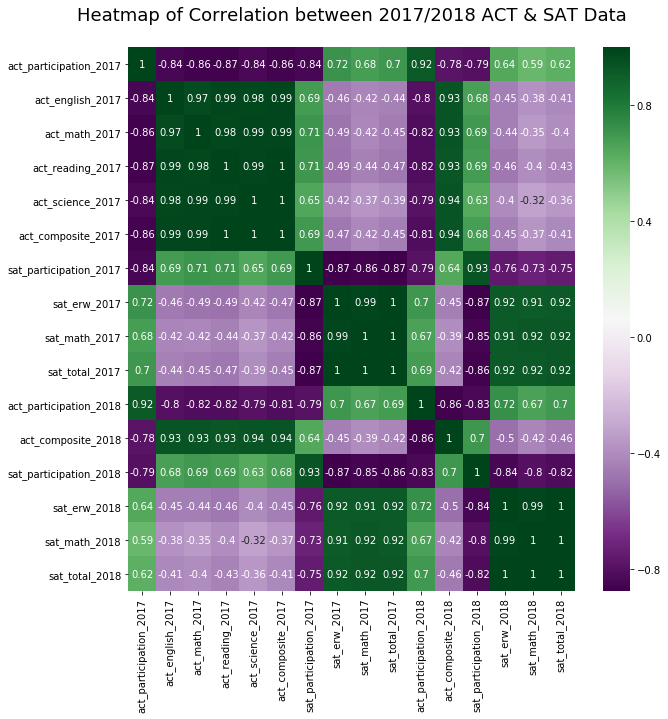

In [115]:
# Seaborn heatmap for 'final' dataframe
plt.figure(figsize=(10,10))
plt.title('Heatmap of Correlation between 2017/2018 ACT & SAT Data\n', fontsize=18)
sns.heatmap(final.corr(), annot=True, cmap='PRGn');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [116]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, supertitle):
    sns.set_style('white') # Set seaborn style to increase contrast
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows   
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,nrows*5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        try:  # Error protection in case data is unavailable, displays notice in subplot
            a_val = 1
            c_val = 'steelblue' # Default style values
            if '2017' in str(column): # If it's from 2017, change it to .35 opacity
                a_val = 0.35
            if 'sat' in str(column): # If it's the SAT, change it to gold
                c_val = 'goldenrod'
            if dataframe[column].max() <= 1: # If it's a participation rate, convert to num * 100
                ax[i].hist(dataframe[column]*100, bins=list(range(0,101,10)), facecolor=c_val, alpha=a_val)
                ax[i].set_xticks(list(range(0,101,10)))
                ax[i].axvline(x=dataframe[column].mean()*100,linestyle='--',color='red',linewidth=2) # Plot mean, then 25th/75th %s
                ax[i].axvline(x=np.percentile(dataframe[column],25)*100,linestyle='--',color='black',linewidth=1)
                ax[i].axvline(x=np.percentile(dataframe[column],75)*100,linestyle='--',color='black',linewidth=1)
            else: # If it's not a participation rate/percentage
                ax[i].hist(dataframe[column], facecolor=c_val, alpha=a_val) # feel free to add more settings
                ax[i].axvline(x=dataframe[column].mean(),linestyle='--',color='red',linewidth=2)
                ax[i].axvline(x=np.percentile(dataframe[column],25),linestyle='--',color='black',linewidth=1)
                ax[i].axvline(x=np.percentile(dataframe[column],75),linestyle='--',color='black',linewidth=1)
                
            ax[i].set_title(list_of_titles[i], fontsize=14) # Do these for all vals
            ax[i].set_xlabel(list_of_xlabels[i])
            ticks = ax[i].get_yticks()
            ax[i].set_yticklabels([int(tick) for tick in ticks]) # Convert y-axis to integer
            
        except: # In case data is unavailable
            ax[i].set_title(list_of_titles[i], fontsize=14)
            ax[i].text(0.5,0.5,'Data Not Available',fontsize=10,ha='center') # Display notice center
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.subplots_adjust(hspace=0.25, top=0.91) # Adjust for style
    plt.suptitle(supertitle, fontsize=18)
    if len(list_of_columns)%2: # If there is an odd number of plots, delete the last one auto
        plt.delaxes(ax[len(list_of_columns)])
    return fig, ax # Return the figure and axes object, to be printed as called


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

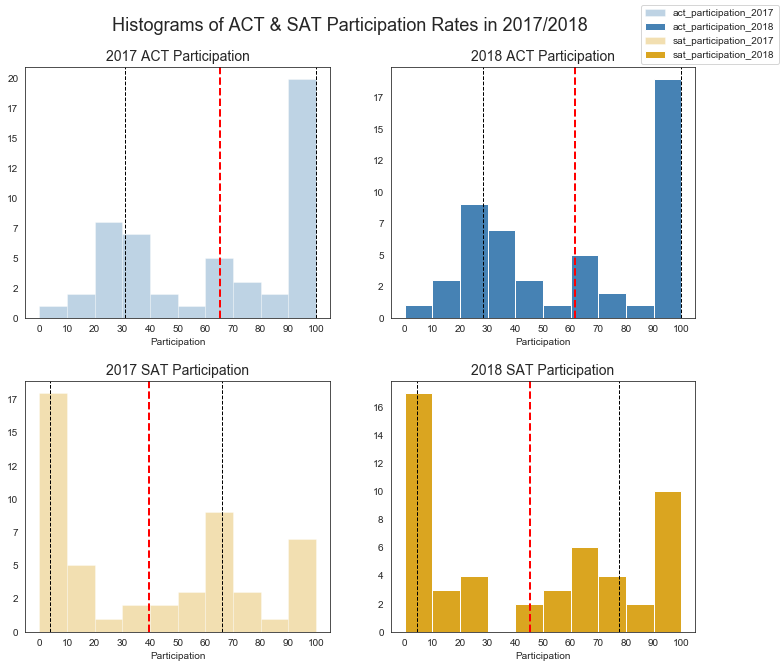

In [117]:
sph_columns = ['act_participation_2017', 'act_participation_2018', # Define criteria in lists
               'sat_participation_2017', 'sat_participation_2018']
sph_titles = ['2017 ACT Participation', '2018 ACT Participation', 
              '2017 SAT Participation', '2018 SAT Participation']
sph_xlabels = ['Participation', 'Participation', 'Participation', 'Participation']
fig, ax = subplot_histograms(final, sph_columns, sph_titles, sph_xlabels, 'Histograms of ACT & SAT Participation Rates in 2017/2018')
plt.figlegend()
plt.show(); # Load up function and run


These histograms comparing 2017/2018 ACT and SAT participation rates show that the ACT exam has a significantly larger portion of states where it is a mandatory exam.  Its lead has decreased from the prior year, but the ACT has approximately 19 states with 100% participation, while thet SAT only claims 10.  However, the SAT grew by 4 new states with 100% participation - a quick upward trend against the ACT's decrease by one.  

The SAT has 17 states in 2018 where 0-10% of students took the test, while the ACT has only one.  The ACT appears to be widely taken, while the SAT is more regionally limited.  

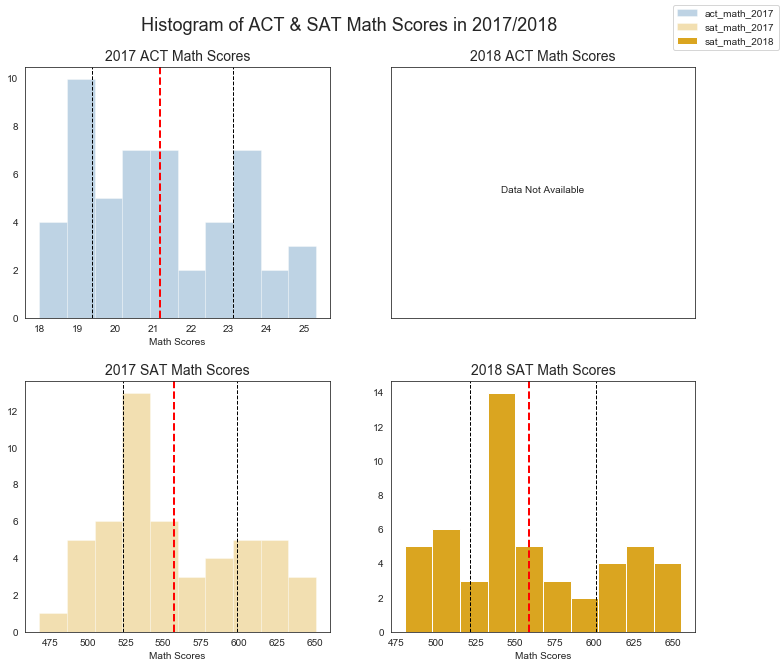

In [118]:
sph_columns = ['act_math_2017', 'act_math_2018', 
               'sat_math_2017', 'sat_math_2018']
sph_titles = ['2017 ACT Math Scores', '2018 ACT Math Scores', 
              '2017 SAT Math Scores', '2018 SAT Math Scores']
sph_xlabels = ['Math Scores', 'Math Scores', 'Math Scores', 'Math Scores']
fig, ax = subplot_histograms(final, sph_columns, sph_titles, sph_xlabels, 'Histogram of ACT & SAT Math Scores in 2017/2018')
plt.figlegend()
plt.show();


Math scores for the ACT from 2017 show a large number of states in the first quartile (0-25%) of the distribution of state average scores.  The SAT shows a higher number of states falling within the second quartile (26-50%) of state average scores - this indicates that 

In [119]:
# Combine ACT English and Reading test scores to compare directly to SAT ERW
final.loc[:,'act_eng_read_comb_2017'] = final.loc[:,'act_english_2017'] + final.loc[:,'act_reading_2017']

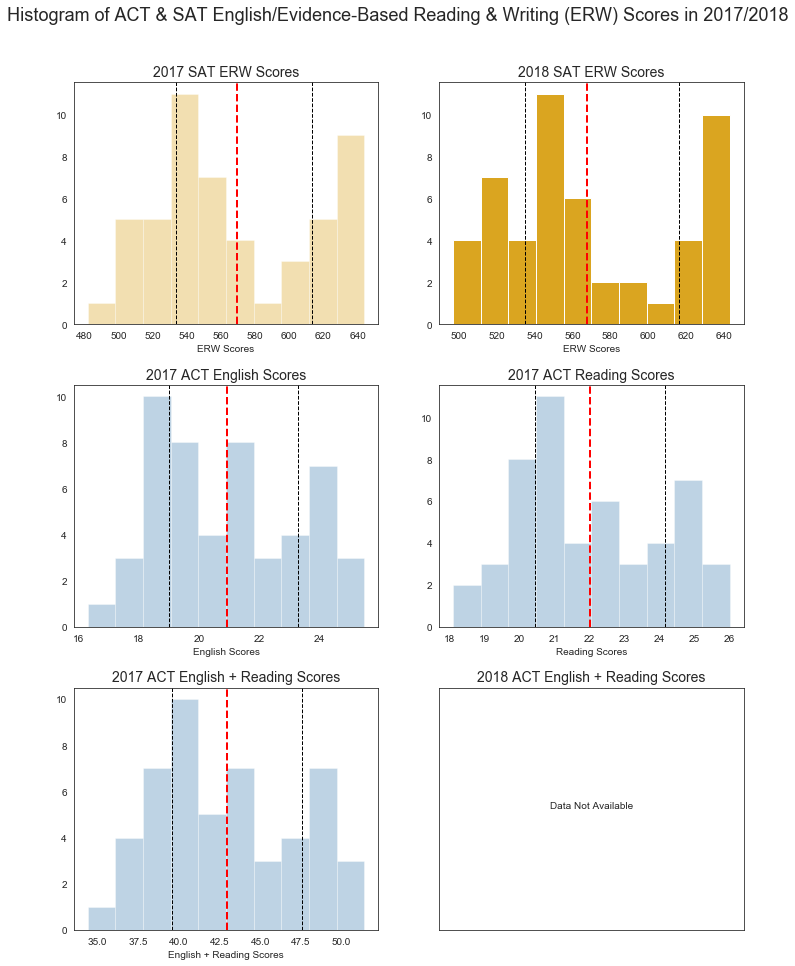

In [120]:
sph_columns = ['sat_erw_2017', 'sat_erw_2018',
               'act_english_2017', 'act_reading_2017',
               'act_eng_read_comb_2017', 'act_eng_read_comb_2018']
sph_titles = ['2017 SAT ERW Scores', '2018 SAT ERW Scores',
              '2017 ACT English Scores', '2017 ACT Reading Scores', 
              '2017 ACT English + Reading Scores','2018 ACT English + Reading Scores']
sph_xlabels = ['ERW Scores', 'ERW Scores',
               'English Scores', 'Reading Scores', 
               'English + Reading Scores','English + Reading Scores']
fig, ax = subplot_histograms(final, sph_columns, sph_titles, sph_xlabels, 'Histogram of ACT & SAT English/Evidence-Based Reading & Writing (ERW) Scores in 2017/2018')
plt.show();

These histograms show ACT scores for two separate English and Reading exams, and a comparison of combined ERW SAT scores between 2017 and 2018.

Between ACT English and Reading scores in 2017, we see a higher mean score of 22 for ACT Reading vs 21 for ACT English, which are close.  However, a 14 states land in the bottom quartile (0-25%) in the English test, while only 13 do for Reading.  

For the SAT histograms, we can see that the mean state average for ERW 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [121]:
def multi_pair_scatter(dataframe, list_of_pairs, list_of_pair_labels, list_of_ax_titles, supertitle):
    sns.set_style('white')
    nrows = int(np.ceil(len(list_of_pairs)/2)) # Makes sure you have enough rows   
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,nrows*5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, pair in enumerate(list_of_pairs): # Gives us an index value to get into all our lists
        try: 
            a_val = 1
            c_val = 'steelblue'
            if ('2017' in str(pair[0]))&('2017' in str(pair[1])):
                a_val = 0.35
            elif (('2017' in str(pair[0]))&('2018' in str(pair[1])))\
                |(('2018' in str(pair[0]))&('2017' in str(pair[1]))):
                a_val = 0.65
            if ('sat' in str(pair[0]))&('sat' in str(pair[1])):
                c_val = 'goldenrod'
            elif (('sat' in str(pair[0]))&('act' in str(pair[1])))\
                |(('act' in str(pair[0]))&('sat' in str(pair[1]))): 
                c_val = 'mediumseagreen'
            sns.regplot(pair[0], pair[1], data=dataframe, ax=ax[i], # Regplot automatically adds regression
                        line_kws={'color':c_val}, scatter_kws={'color':c_val,'alpha':a_val})
            ax[i].set_title(list_of_ax_titles[i], fontsize=14)
            ax[i].set_xlabel(list_of_pair_labels[i][0])
            ax[i].set_ylabel(list_of_pair_labels[i][1])
        except:
            ax[i].set_title(list_of_ax_titles[i], fontsize=14)
            ax[i].text(0.5,0.5,'Data Not Found',fontsize=10,ha='center')
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.subplots_adjust(hspace=0.25, top=0.93)
    plt.suptitle(supertitle, fontsize=18)
    if len(list_of_pairs)%2:
        plt.delaxes(ax[len(list_of_pairs)])
    #plt.show();
    return fig, ax

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


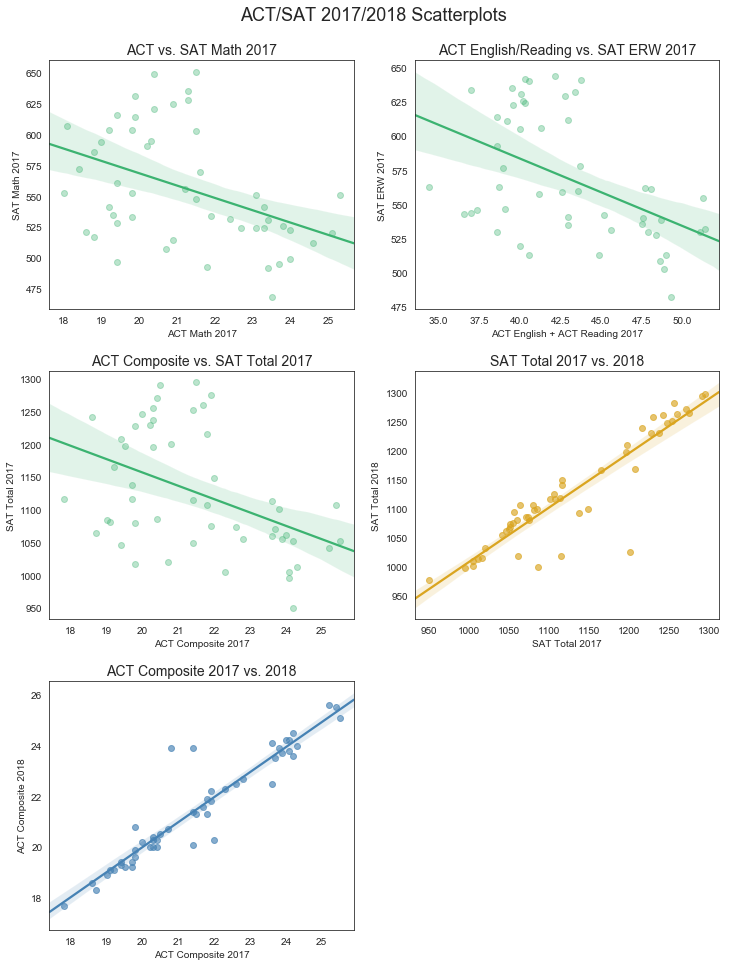

In [122]:
pair_list = [('act_math_2017','sat_math_2017'),
             ('act_eng_read_comb_2017','sat_erw_2017'),
             ('act_composite_2017','sat_total_2017'),
             ('sat_total_2017','sat_total_2018'),
             ('act_composite_2017','act_composite_2018')]
label_pair_list = [('ACT Math 2017','SAT Math 2017'),
             ('ACT English + ACT Reading 2017','SAT ERW 2017'),
             ('ACT Composite 2017','SAT Total 2017'),
             ('SAT Total 2017','SAT Total 2018'),
             ('ACT Composite 2017','ACT Composite 2018')]
ax_title_list = ['ACT vs. SAT Math 2017', 'ACT English/Reading vs. SAT ERW 2017',
                'ACT Composite vs. SAT Total 2017','SAT Total 2017 vs. 2018',
                'ACT Composite 2017 vs. 2018']
fig, ax = multi_pair_scatter(final, pair_list, label_pair_list, ax_title_list, 'ACT/SAT 2017/2018 Scatterplots')
plt.show();

There are two distinct trends that reflect the nature of each comparison.  For the green examples, comparisons are between ACT and SAT within the same year.  We used 2017 because ACT test data by subject was not available for 2018.  These show a regression line with a negative slope, meaning that the higher a state's ACT score, the lower the state's SAT score in the respective subject will tend to be.  Note that the ACT separates Reading and English tests while the SAT combines them as "Evidence-based Reading & Writing" - for the purposes of comparison in the upper right plot, the ACT values have been combined.

In contrast, we see positive slopes in the scatterplots for the same exam across multiple years.  It indicates that the higher a state performed on either test in 2017, the higher they are likely to have performed on that same test in 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

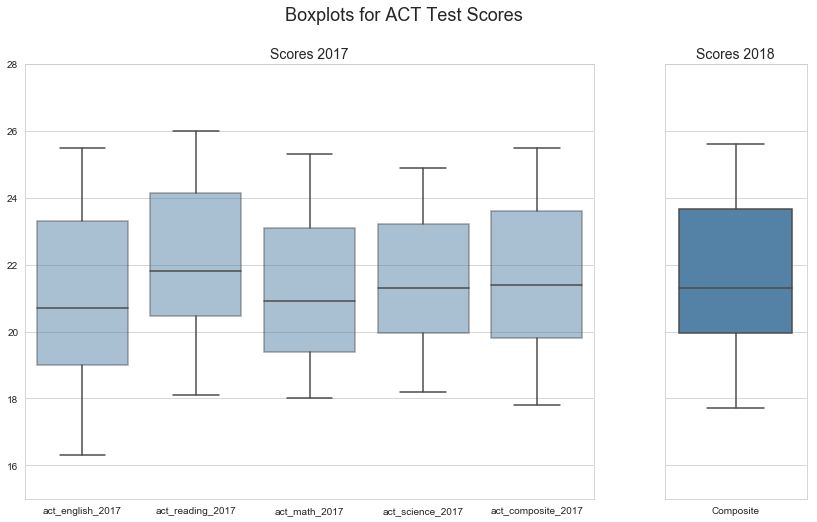

In [123]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(1,2,figsize=(14,8),sharey=True,gridspec_kw = {'width_ratios':[4, 1]})
ax = ax.ravel()

ax[0] = sns.boxplot(data=final[['act_english_2017','act_reading_2017','act_math_2017',
                        'act_science_2017','act_composite_2017']],
            ax=ax[0],orient='v',color='steelblue', boxprops={'alpha':0.5})
ax[0].set_title('Scores 2017',fontsize=14)
ax[0].set_ylim([15,27])
ax[0].set_xticks(range(0,5))
#ax[0].set_xticklabels(['English','Reading','Math','Science','Composite'])

ax[1] = sns.boxplot(x='act_composite_2018',data=final,ax=ax[1],orient='v',color='steelblue',boxprops={'alpha':1})
ax[1].set_title('Scores 2018',fontsize=14)
ax[1].set_ylim([15,28])
ax[1].set_xticks(range(0,1))
ax[1].set_xticklabels(['Composite'])
ax[1].set_ylabel('')

plt.suptitle('Boxplots for ACT Test Scores\n', fontsize=18)

plt.show();                                                                   

The Composite ACT results from 2018 are very close to the Composite ACT results from 2017.  We can see that in 2017, English had the widest range as well as the lowest average result.

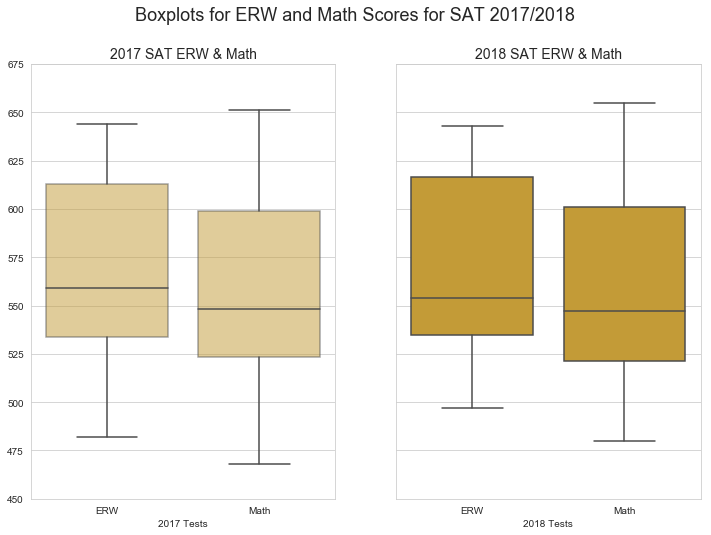

In [124]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(1,2,figsize=(12,8),sharey=True)
ax = ax.ravel()

ax[0] = sns.boxplot(data=final[['sat_erw_2017','sat_math_2017']],ax=ax[0],orient='v',
            color='goldenrod', boxprops={'alpha':0.5})
ax[0].set_ylim([450,675])
ax[0].set_title('2017 SAT ERW & Math',fontsize=14)
ax[0].set_xticks(range(0,2))
ax[0].set_xticklabels(['ERW','Math'])
ax[0].set_xlabel('2017 Tests')

ax[1] = sns.boxplot(data=final[['sat_erw_2018','sat_math_2018']],ax=ax[1],orient='v',
            color='goldenrod', boxprops={'alpha':1})
ax[1].set_ylim([450,675])
ax[1].set_title('2018 SAT ERW & Math',fontsize=14)
ax[1].set_xticks(range(0,2))
ax[1].set_xticklabels(['ERW','Math'])
ax[1].set_xlabel('2018 Tests')
           
plt.suptitle('Boxplots for ERW and Math Scores for SAT 2017/2018\n', fontsize=18)

plt.show();

Based on these boxplots, we can see that for both years, ERW results were better on average than Math.  However, Math claimed the highest maximum both years, which reflects self-selection among test-takers in optional states.  The interquartile range improved between 2017 to 2018, but the means each declined.

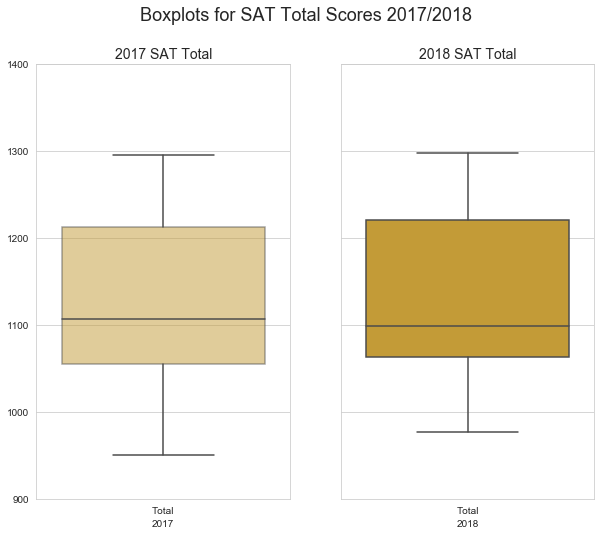

In [125]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,2,figsize=(10,8),sharey=True)

ax[0] = sns.boxplot(data=final[['sat_total_2017']],ax=ax[0],
            color='goldenrod', boxprops={'alpha':0.5})
ax[0].set_ylim([900,1400])
ax[0].set_title('2017 SAT Total',fontsize=14)
ax[0].set_xticks(range(0,1))
ax[0].set_xticklabels(['Total'])
ax[0].set_xlabel('2017')

ax[1] = sns.boxplot(data=final[['sat_total_2018']],ax=ax[1],
            color='goldenrod', boxprops={'alpha':1})
ax[1].set_title('2018 SAT Total',fontsize=14)
ax[1].set_xticks(range(0,1))
ax[1].set_xticklabels(['Total'])
ax[1].set_xlabel('2018')

plt.suptitle('Boxplots for SAT Total Scores 2017/2018\n', fontsize=18)

plt.show();

We can see that although the mean score decreased in 2018, scores overall improved since 2017.  Notably, the minimum value in 2018 is much higher than the minimum from 2017.

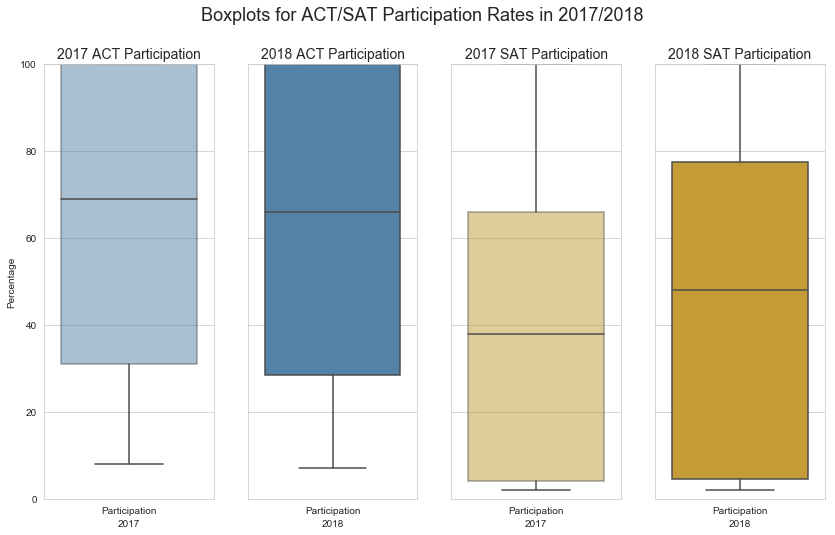

In [126]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4,figsize=(14,8),sharey=True)
ax = ax.ravel()

#final.act_participation_2018, final.sat_participation_2017, final.sat_participation_2018]

ax[0] = sns.boxplot(data=final[['act_participation_2017']]*100,ax=ax[0],color='steelblue',boxprops={'alpha':0.5})
ax[0].set_title('2017 ACT Participation',fontsize=14)
ax[0].set_xticks(range(0,1))
ax[0].set_xticklabels(['Participation'])
ax[0].set_xlabel('2017')
ax[0].set_ylim([0,100])
ax[0].set_yticks(range(0,101,20))
ax[0].set_yticklabels(list(range(0,101,20)))
ax[0].set_ylabel('Percentage')

ax[1] = sns.boxplot(data=final[['act_participation_2018']]*100,ax=ax[1],color='steelblue',boxprops={'alpha':1})
ax[1].set_title('2018 ACT Participation',fontsize=14)
ax[1].set_xticks(range(0,1))
ax[1].set_xticklabels(['Participation'])
ax[1].set_xlabel('2018')

ax[2] = sns.boxplot(data=final[['sat_participation_2017']]*100,ax=ax[2],color='goldenrod',boxprops={'alpha':0.5})
ax[2].set_title('2017 SAT Participation',fontsize=14)
ax[2].set_xticks(range(0,1))
ax[2].set_xticklabels(['Participation'])
ax[2].set_xlabel('2017')

ax[3] = sns.boxplot(data=final[['sat_participation_2018']]*100,ax=ax[3],color='goldenrod',boxprops={'alpha':1})
ax[3].set_title('2018 SAT Participation',fontsize=14)
ax[3].set_xticks(range(0,1))
ax[3].set_xticklabels(['Participation'])
ax[3].set_xlabel('2018')

plt.suptitle('Boxplots for ACT/SAT Participation Rates in 2017/2018\n', fontsize=18)

plt.show();

The ACT has such a high portion of 100% participation that the third quartile is the same as the maximum.  This occurred in both years, but we can see a slight decrease in both minimum and average values for ACT.  SAT on the other hand shows a significant increase, especially in the third quartile and average.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## ACT Participation in 2018 by State

Gradient from **Clear = 0%** to **Solid Blue = 100%**

<img src="../data/act_participation_2018.png" />


We can see in this map of the continental US that the ACT exam is concentrated around the Midwest, which includes 19 states with 100% participation.  

## SAT Participation in 2018 by State

Gradient from **Clear = 0%** to **Solid Gold = 100%**

<img src="../data/sat_participation_2018.png" />

The SAT participation map, on the other hand, shows a coastal and regional concentration.  We see 10 100% participation states, but there is a wide open gap of 0-10% participation in the middle of the country.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [127]:
final.shape

(51, 18)

In [128]:
def convert_to_label(column_list): # Function to convert column_format_names to CAPS HEADER
    list_out = []
    for col_name in column_list:
        word_out = ''
        for letter in col_name:
            if letter == '_': word_out += ' '
            else: word_out += letter
        list_out.append(word_out.upper())
    return list_out
            

In [129]:
all_col_labels = convert_to_label(final.columns.tolist()[1:]) # Create Column Labels list for
all_col_labels                                              # subplot_histograms function

['ACT PARTICIPATION 2017',
 'ACT ENGLISH 2017',
 'ACT MATH 2017',
 'ACT READING 2017',
 'ACT SCIENCE 2017',
 'ACT COMPOSITE 2017',
 'SAT PARTICIPATION 2017',
 'SAT ERW 2017',
 'SAT MATH 2017',
 'SAT TOTAL 2017',
 'ACT PARTICIPATION 2018',
 'ACT COMPOSITE 2018',
 'SAT PARTICIPATION 2018',
 'SAT ERW 2018',
 'SAT MATH 2018',
 'SAT TOTAL 2018',
 'ACT ENG READ COMB 2017']

In [130]:
all_xlabels = ['' for _ in range(1,19)] # fill blank range for x-labels

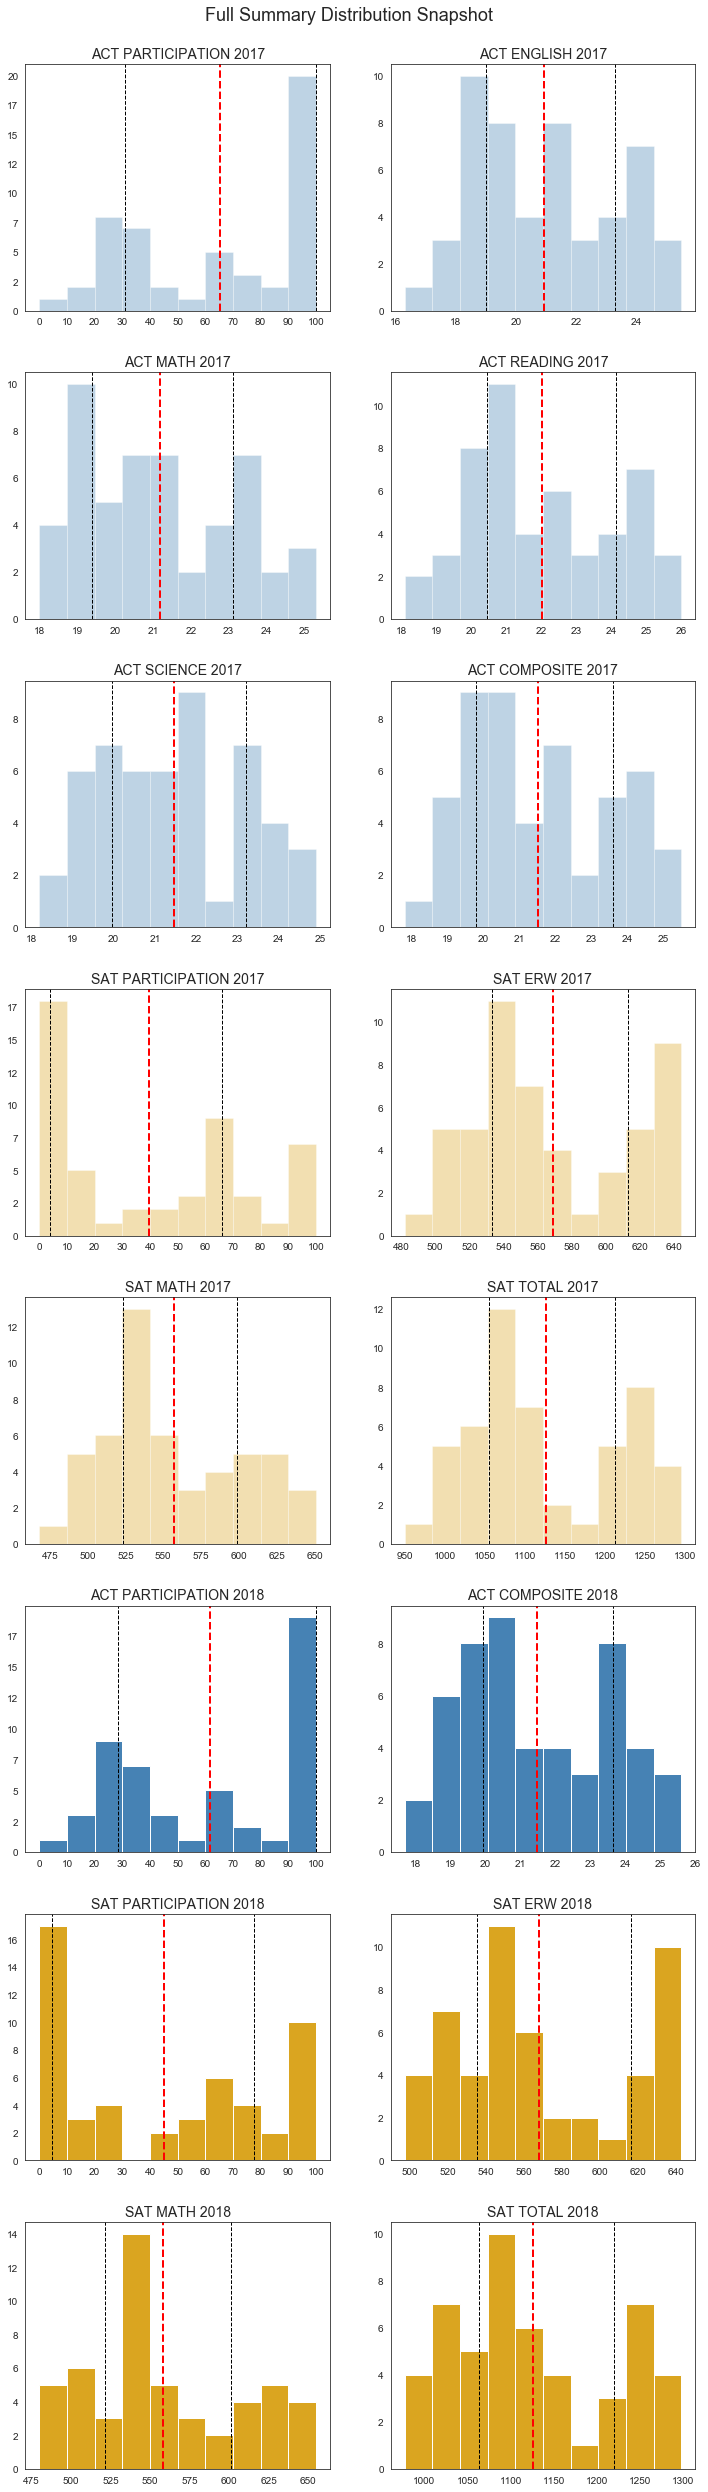

In [131]:
fig, ax = subplot_histograms(final,final.columns.tolist()[1:-1],all_col_labels,all_xlabels,'Full Summary Distribution Snapshot')
plt.subplots_adjust(top=0.96)
plt.show(); # call subplot_histograms function for distribution snapshot


Answers:

# 2017
## ACT

**Participation**

The largest bin is in the 90-100% group, showing that the ACT had 20 of states with full or near-full participation.  The swell around the first quartile suggests that 14 states had 20-40% of students take the ACT during 2017.  This distribution is skewed highly left.
    
**English**

The most common state average scores are below the first quartile, with 14 of 50 states, suggesting a large group of states that do not perform well on English exams relative to the full population of ACT English States.  Noted spikes in the third and fourth quartiles may be related to self-selection among test takers in states where the ACT is not mandatory. This distribution is skewed slightly right, with concentrations around averages of 22 and 24 points.

**Math**

Like English, the ACT Math showed the largest bin membership in the bottom quartile with 10 states around 19 points average.  This suggests a sizable contingent of states that underperformed around the same level across multiple ACT exams this year.  This distribution is skewed slightly right, with a notable drop in bin membership around 22 points, opposite of the English results.

**Reading**

Reading stands out as the highest bin performing in the second quartile and not the lowest.  This indicates that overall, states averaged slightly higher on the Reading exam than on the ACT English in 2017.  More normally distributed than the other individual ACT test results for 2017, and skewed slightly right.

**Science**

Science test results stand out as highly normalized, with a single major gap in the bin around 22.5, with only a single state included.  This suggests the test is structured such that results between 22 and 23 are less common that those above and below the range.

**Composite**

The ACT composite as an average of multiple tests is more normalized, and reflects the mild right-skew as well as scoring dips around the 21 and 23 point bins.  18 states scored in bins around 20 points, centered around the first quartile. 

## SAT

**Participation**

The SAT in 2017 had only 6 states with 90-100% participation rates, and a surprising 17 with 0-10%.  This shows that the SAT was significantly less prominently taken across the US this year.  There is a bump around 60%, with 8 states near the range.  This is likely due to the many states that allow both tests to be taken by students.  Distribution is skewed highly right.

**Evidence-based Reading & Writing**

SAT ERW results for 2017 have two primary peaks: 12 states averaging around 540, near the first quartile, while 9 states' averages are very high around 640, the highest bin.  This reflects the self-selection of test-takers in states where the SAT is optional - those more likely to perform well are also more likely to opt to spend the time and energy taking the SAT.

**Math**

Math results for 2017 are similar to ERW, with a notable difference - the top bin is much less crowded, with 3 states between 630 and 650.  This suggests a different likelihood of top performance among states' test-takers: it is possible SAT Math is more challenging than SAT ERW, self-selecting students are less likely to take Math optionally, or a combination.

**Total**

The largest bin membership falls within the second quartile, with 12 states averaging between 1050 and 1100 combined.  A self-selection spike is observable around 1250 with 8 states included.  A notable valley shows only 3 states falling in bins between 1125 and 1200.

# 2018
## ACT

**Participation**

ACT participation was similar in 2018 as the previous year, but the top bin of 90-100% decreased from 20 to 19 states.  Distribution is skewed heavily left.

**Composite**

Composite results for 2018 are evenly spread and fairly normalized, with two balanced peaks at the first and third quartile.

## SAT

**Participation**

SAT participation at the highest bin increased to 10 from only 6, a jump of 4 states. The distribution is visiually similar to that from 2017 but denser in the third and fourth quartiles.  Skewed to the right.

**Evidence-based Reading & Writing**

ERW 2018 distribution is more normal than participation rate for the same year, and shows strong self-selection with 2 additional states (totaling 10) in the highest bin averaging 630-640.  12 states fall in the second quartile, in the highest populated bin between 540 and 560.

**Math**

The SAT Math 2018 results are the most even of all plotted distributions above - no more than six states appear in any given bin except for the highest populated: 14 states between 535 and 550.  

**Total**

The SAT Total for 2018 appears skewed slightly right, and the distribution of the first through third quartiles appears normal.  However, self-selection persists with spikes in the fourth quartile.  This spike decreased from 2017 (7 states between 1240 and 1260, down one from 8), likely resulting from increasing options for both tests among all test-takers.
    

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

We do not see this trend in most of the distributions.  This reflects human intervention, including mandatory test requirements for either SAT or ACT and self-selection based on anticipated success, especially in states where both tests are available options for students.

We do see normal distributions in our ACT Composite and SAT Total scores for both years, which abides by the central limit theorem, wherein the more tests increase the size of our populations, the closer to a normal distribution we will trend.  The ACT Science results in 2017 are the most normally distributed, which requires students hold specific scientific knowledge, as opposed to more generally applicable knowledge of mathematics and language.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

**Math**

Math distributions appear to be moderately normalized among SAT data available, as the peaks tend towards the second and third quartiles.  Any estimates made from this data can be considered with a large enough margin of error.  ACT Math appears skewed right, and would guide estimates of outcomes towards the first quartile.

**Reading**

ACT Reading results are moderately normalized, which is reflected in part by the close proximity of the interquartile range.  Though it is slightly skewed right, results are densely concentrated in the middle.  

**Rates**

Rates are highly non-normal, reflecting certain states with mandatory participation (100%) in ACT or SAT exams, as well as multiple states that do not mandate standardized college entry testing at all.  However, excepting states in the upper-most and lower-most histogram bins, the bins between appear visually normalized.  Any rates predictions around normal data should be limited to these inner bins; any predictions of the bins on the ends will be best informed by knowledge of the legal and testing business landscape, among other possible human trends.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

It would make sense, as it can be formed into a coherent negative hypothesis and positive hypothesis.

Null Hypothesis: Participation rates for states between tests are unrelated and vary independently.

Alternative Hypothesis: Participation rates for states between tests are statistically related.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

It is not appropriate to compare SAT and ACT math score results, as the tests are graded on different scales, and were administered with different formats.  There is also an unknown overlapping portion of test-takers across states.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [132]:
result = stats.ttest_ind(final['act_participation_2017'], final['sat_participation_2017'])
result.statistic, result.pvalue

(3.8085778908170544, 0.00024134203698662353)

Through inspection of the T-statistic and P-value generated by comparison of ACT and SAT participation in 2017, we can see a high confidence that there is a statistically significant relationship between the figures.  If our Null Hypothesis that there is no connection were true, the T-statistic would be close to zero; it is instead a noticeable 3.8.  Our P-value of 0.00024 tells us that the odds of our T-statistic results occurring without any statistical significance are a vanishingly small .002%.  We can be highly confident that the two variables are connected statistically.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

**Links for Legal Dictionary of Free and/or Required Testing**

https://magoosh.com/hs/act/2017/states-provide-act-free/

https://magoosh.com/hs/sat/2017/states-provide-sat-free/

https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/

In [133]:
legal_dict = { # Dictionary to store legal status of ACT/SAT for each state
    'free_act':[
        'Alabama','Arkansas','Colorado','Hawaii','Kentucky',
        'Louisiana','Mississippi','Missouri','Montana',
        'Nevada','North Carolina','Oklahoma','South Carolina',
        'Utah','Wisconsin','Wyoming'
    ],
    'free_sat':[
        'Colorado','Connecticut','Delaware','Illinois',
        'Ohio','Oklahoma','Michigan','New Hampshire'
    ],
    'required_act':[
        'Alabama','Hawaii','Kentucky','Louisiana',
        'Mississippi','Missouri','Montana','Nebraska',
        'Nevada','North Carolina','South Carolina','Utah',
        'Wisconsin','Wyoming'
    ],
    'required_sat':[
        'Colorado','Connecticut','Delaware','District of Columbia',
        'Illinois','Maine','Michigan','New Hampshire','West Virginia'
    ],
    'required_act_or_sat':[
        'Idaho','Ohio','Tennessee'
    ]
}

In [134]:
target_states = [] # Identify target states for recommendation by excluding existing legal statuses 
for state in final.state:
    if (state not in legal_dict['required_act'])\
        &(state not in legal_dict['free_act'])\
        &(state not in legal_dict['free_sat'])\
        &(state not in legal_dict['required_sat'])\
        &(state not in legal_dict['required_act_or_sat']):
        target_states.append(state)
target_states
        

['Alaska',
 'Arizona',
 'California',
 'Florida',
 'Georgia',
 'Indiana',
 'Iowa',
 'Kansas',
 'Maryland',
 'Massachusetts',
 'Minnesota',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Dakota',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Dakota',
 'Texas',
 'Vermont',
 'Virginia',
 'Washington']

The list of `target_states` reflects all states that currently have no legal mandate to take any test nor subsidies for test takers.  These present opportunities for marketing or lobbying efforts by the College Board to promote the SAT.

In [135]:
filter_list = ['state','act_participation_2017','act_participation_2018','sat_participation_2017','sat_participation_2018']

Displaying our final dataframe for any states without existing legal structures around ACT/SAT exams along with 2017/2018 participation rates:

In [136]:
final[(final['state'].isin(target_states))&(final['sat_participation_2018']<.5)][filter_list]
                                          

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
1,Alaska,0.65,0.33,0.38,0.43
2,Arizona,0.62,0.66,0.30,0.29
15,Iowa,0.67,0.68,0.02,0.03
16,Kansas,0.73,0.71,0.04,0.04
23,Minnesota,1.00,0.99,0.03,0.04
31,New Mexico,0.66,0.67,0.11,0.16
34,North Dakota,0.98,0.98,0.02,0.02
37,Oregon,0.40,0.42,0.43,0.48
41,South Dakota,0.80,0.77,0.03,0.03


Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

## Conclusions and Recommendations

In reviewing ACT and SAT participation data from 2017 and 2018, as well as the status of applicable state laws regarding testing subsidies and requirements, we recommend that the College Board prioritize its marketing and lobbying efforts in **New Mexico**.

<img src="../data/new_mex_flag.jpeg" />

The College Board should seize the opportunity to invest its marketing and lobbying efforts in New Mexico based on both statistical and environmental factors.  

*Geography*

New Mexico resides in a balanced location in the Southwest US, nestled against the ACT stronghold of the Midwest but adjacent to Texas, which experienced an increase in SAT participation from 62% in 2017 to 66% in 2018.  

In [137]:
final[final['state']=='Texas'][filter_list]  # Participation detail query for Texas

,state,act_participation_2017,act_participation_2018,sat_participation_2017,sat_participation_2018
43,Texas,0.45,0.45,0.62,0.66


It also shares its Northern border with Colorado, which recently passed legislation making the SAT a mandatory as well as a subsidized exam for college-bound students.  This increasing presence of the SAT in the regional culture around New Mexico increases the likelihood that marketing and lobbying efforts will be effective.

*Participation Growth Potential*

New Mexico saw an increase from just 11% SAT participation in 2017 to 16% in 2018, which represents almost 50% growth in a year, yet still leaves major room for growth.  This contrasts with an ACT participation rate that increased slightly from 66% to 67% over the same year, but is relatively low considering how common 100% participation for ACT is in the region.  

*Strategy*

The College Board should undertake the following strategies within the state of New Mexico:

**1. Engage with State and Local Governments**

The SAT can be offered for free or discounted to students at both the state level and the municipal - even if a state doesn't provide for all, individual school districts are able to offer free SAT admission for local citizens.  Currently, none of these programs exist at the state level in New Mexico, and a more compelling case can be made in its favor.

**2. Invest in Marketing Efforts**

New Mexico is a state where students have the freedom to choose the college exam they prefer, or to skip it altogether.  With this, there is a contingent of potential customers still untapped by the ACT exam that may be reached by effective communication.

**3. Leverage Neighbors' Successes**

Lobbying and marketing efforts should make use of trends in Texas and Colorado, where SAT participation rates are increasing significantly.  This momentum can be harnessed to increase SAT participation rates across the wider Southwest.